<a href="https://colab.research.google.com/github/joaohnt/sentiment-classifier-twt/blob/main/classificacao_sentimento_base_de_dados_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# lib

In [ ]:
!pip install spacy --upgrade

In [ ]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 45.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

# pp

In [ ]:
base_dados = pd.read_csv('/content/Train50.csv', encoding='utf-8', sep=';')

In [ ]:
base_dados

,id,tweet_text,tweet_date,sentiment,query_used
0,1050785521201541121,@Laranjito76 A pessoa certa para isso seria o ...,Fri Oct 12 16:29:25 +0000 2018,1,:)
1,1050785431955140608,"@behin_d_curtain Para mim, é precisamente o co...",Fri Oct 12 16:29:04 +0000 2018,1,:)
2,1050785401248645120,Vou fazer um video hoje... estou pensando em f...,Fri Oct 12 16:28:56 +0000 2018,1,:)
3,1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei e...",Fri Oct 12 16:28:49 +0000 2018,1,:)
4,1050785368902131713,Valoriza o coração do menininho que vc tem. El...,Fri Oct 12 16:28:49 +0000 2018,1,:)
...,...,...,...,...,...
49995,1046762827053232128,:( é tão lindo que dói https://t.co/GqnpgyWWxB,Mon Oct 01 14:04:40 +0000 2018,0,:(
49996,1046762813362966529,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",Mon Oct 01 14:04:37 +0000 2018,0,:(
49997,1046762806392082432,eu te amo tanto minja vidinha meu bem mais pre...,Mon Oct 01 14:04:35 +0000 2018,0,:(
49998,1046762752071618560,@itsLary @jessboluda Pfvor :(,Mon Oct 01 14:04:22 +0000 2018,0,:(


In [ ]:
base_dados.drop(['id', 'tweet_date', 'query_used'], axis = 1, inplace = True)

In [ ]:
base_dados.head()

,tweet_text,sentiment
0,@Laranjito76 A pessoa certa para isso seria o ...,1
1,"@behin_d_curtain Para mim, é precisamente o co...",1
2,Vou fazer um video hoje... estou pensando em f...,1
3,"aaaaaaaa amei tanto essas polaroids, nem sei e...",1
4,Valoriza o coração do menininho que vc tem. El...,1


In [ ]:
base_dados.tail()

,tweet_text,sentiment
49995,:( é tão lindo que dói https://t.co/GqnpgyWWxB,0
49996,"@veraluciarj Pois é.. tenho problema c/ ""coisa...",0
49997,eu te amo tanto minja vidinha meu bem mais pre...,0
49998,@itsLary @jessboluda Pfvor :(,0
49999,@Renk_lol Passa ano Entra ano Eu nao desisto d...,0


In [ ]:
pontuacoes = string.punctuation

In [ ]:
from spacy.lang.pt.stop_words import STOP_WORDS
stop_words = STOP_WORDS

In [ ]:
pln = spacy.load("pt_core_news_sm")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
def pp(texto):
  texto = texto.lower()
  doc = pln(texto)

  lista = []
  for token in doc:
    lista.append(token.lemma_)

  lista = [palavra for palavra in lista if palavra not in stop_words and palavra not in pontuacoes]
  lista = [palavra for palavra in lista if not palavra.startswith('@')]
  lista = [palavra for palavra in lista if not palavra.startswith('https://')]
  lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

  return lista

In [ ]:
teste = pp(' joao pedro está feliz 10 sei nÃO')
teste

'  joao Pedro feliz'

In [ ]:
base_dados['tweet_text'] = base_dados['tweet_text'].apply(pp)

In [ ]:
base_dados.head()

,tweet_text,sentiment
0,pessoa certo vale azevedo :),1
1,precisamente contrário :) vir chuva vir dispos...,1
2,video hoje ... pensar falar meta de o csgo pag...,1
3,aaaaaaaar amei polaroids expressar to apaixona...,1
4,valorizar coração de o menininho vc diferente ...,1


In [ ]:
base_dados.tail()

,tweet_text,sentiment
49995,:( lir dói,0
49996,.. problema c/ .. de o toc :((( em o entanto e...,0
49997,amo minja vidinho precioso desculpa péssima ut...,0
49998,pfvor :(,0
49999,passar ano entrar ano nao desisto de o em o :(,0


In [ ]:
base_dados_final = []
i = 0
for texto, emocao in zip(base_dados['tweet_text'], base_dados['sentiment']):
  if emocao == 1:
    dic = ({"BOM": True, "RUIM": False})
  elif emocao == 0:
    dic = ({"BOM": False, "RUIM": True})
  base_dados_final.append([texto, dic.copy()])

In [ ]:
modelo = spacy.blank('pt')
textcat = modelo.add_pipe("textcat")
textcat.add_label("BOM")
textcat.add_label("RUIM")
historico = []

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
import spacy
from spacy.training import Example

modelo.begin_training()
for epoca in range(3):
  random.shuffle(base_dados_final)
  losses = {}
  for batch in spacy.util.minibatch(base_dados_final, 500):
    examples = []
    for texto, entities in batch:
      doc = modelo.make_doc(texto)
      example = Example.from_dict(doc, {"cats": entities})
      examples.append(example)

    modelo.update(examples, losses=losses)

  if epoca % 5 == 0:
    print(losses)
    historico.append(losses)

{'textcat': 1.614745250064118}


In [ ]:
historico_loss = []
for i in historico:
  historico_loss.append(i.get('textcat'))

In [ ]:
historico_loss = np.array(historico_loss)
historico_loss

array([1.61474525])

In [ ]:
modelo.to_disk('modelo')

In [ ]:
modelo_carregado = spacy.load('modelo')

In [ ]:
texto_bom = pp('eu estou feliz eba bom dia')
previsao = modelo_carregado(texto_bom)
previsao.cats

{'BOM': 0.9999926090240479, 'RUIM': 7.342337084992323e-06}

In [ ]:
texto_ruim = pp('eu estou triste trevas escuridão')
previsao = modelo_carregado(texto_ruim)
previsao.cats

{'BOM': 0.9971386194229126, 'RUIM': 0.0028613759204745293}

# avaliacao

base treinamento

In [ ]:
previsoes = []
for texto in base_dados['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['BOM'] > previsao['RUIM']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

In [ ]:
respostas_reais = base_dados['sentiment'].values
respostas_reais

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.9999

base teste

In [ ]:
base_dados_teste = pd.read_csv('/content/Test.csv', encoding='utf-8', sep=';')

In [ ]:
previsoes = []
for texto in base_dados_teste['tweet_text']:
  previsao = modelo_carregado(texto)
  previsoes.append(previsao.cats)

In [ ]:
previsoes_final = []
for previsao in previsoes:
  if previsao['BOM'] > previsao['RUIM']:
    previsoes_final.append(1)
  else:
    previsoes_final.append(0)

In [ ]:
respostas_reais = base_dados_teste['sentiment'].values
respostas_reais

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
base_dados_teste['tweet_text'] = base_dados_teste['tweet_text'].apply(pp)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(respostas_reais, previsoes_final)

0.9978

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[2497,    3],
       [   8, 2492]])

<Axes: >

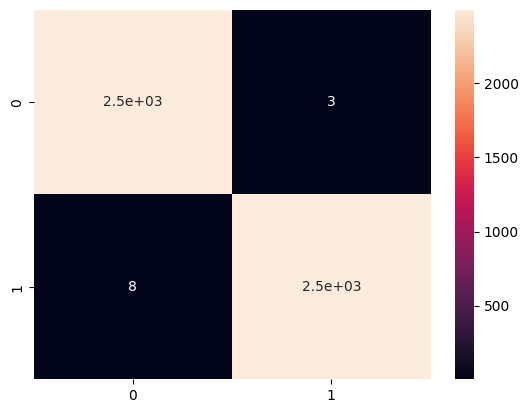

In [ ]:
sns.heatmap(cm, annot=True)